In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.layers import Conv2D,MaxPool2D,BatchNormalization,Flatten,Dense,Input,Dropout
from tensorflow.keras.models import Model

2024-07-25 13:16:01.784021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 13:16:01.784146: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 13:16:01.907635: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train=ImageDataGenerator(rescale=1/255.0,validation_split=0.2)
test=ImageDataGenerator(rescale=1/255.0)

In [4]:
from PIL import Image

In [5]:
img_arr=np.array(Image.open('/kaggle/input/fer2013/train/angry/Training_1021836.jpg'))

In [6]:
img_arr.shape

(48, 48)

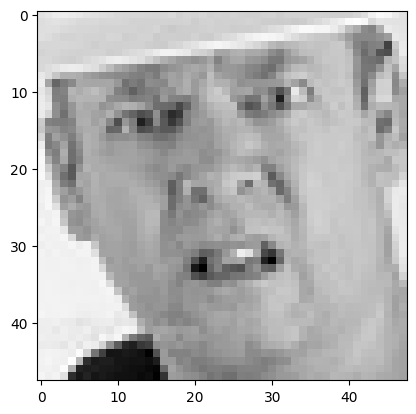

In [7]:
plt.imshow(img_arr,cmap='gray')

In [8]:
BATCH_SIZE=32

In [9]:
train_obj=train.flow_from_directory('/kaggle/input/fer2013/train',subset='training',target_size=(48,48),color_mode='grayscale',class_mode='categorical',batch_size=BATCH_SIZE)
val_obj=train.flow_from_directory('/kaggle/input/fer2013/train',subset='validation',target_size=(48,48),color_mode='grayscale',class_mode='categorical',batch_size=BATCH_SIZE)
test_obj=test.flow_from_directory('/kaggle/input/fer2013/test',target_size=(48,48),batch_size=BATCH_SIZE,class_mode='categorical',color_mode='grayscale')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
test_obj.image_shape

(48, 48, 1)

In [11]:
train_obj.n

22968

In [12]:
train_obj.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [13]:
i=Input(shape=train_obj.image_shape)
x=Conv2D(filters=32,kernel_size=(3,3),activation='relu')(i)
x=BatchNormalization()(x)
x=Conv2D(filters=32,kernel_size=(3,3),activation='relu')(i)
x=MaxPool2D(pool_size=(2,2))(x)
x=Conv2D(filters=64,kernel_size=(3,3),activation='relu')(i)
x=BatchNormalization()(x)
x=Conv2D(filters=64,kernel_size=(3,3),activation='relu')(i)
x=MaxPool2D(pool_size=(2,2))(x)
x=Conv2D(filters=128,kernel_size=(3,3),activation='relu')(i)
x=Conv2D(filters=128,kernel_size=(3,3),activation='relu')(i)
x=BatchNormalization()(x)
x=Conv2D(filters=128,kernel_size=(3,3),activation='relu')(i)
x=MaxPool2D(pool_size=(2,2))(x)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(7,activation='softmax')(x)
model=Model(i,x)

In [14]:
steps_per_epoch_train=train_obj.n//BATCH_SIZE
steps_per_epoch_val=val_obj.n//BATCH_SIZE
steps_per_epoch_test=test_obj.n//BATCH_SIZE


In [15]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
rp=ReduceLROnPlateau()

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','recall','precision'])

In [17]:
model.fit(train_obj,validation_data=val_obj,validation_steps=steps_per_epoch_val,batch_size=BATCH_SIZE,steps_per_epoch=steps_per_epoch_train,epochs=300)

Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/717 ━━━━━━━━━━━━━━━━━━━━ 1:21:21 7s/step - accuracy: 0.2500 - loss: 1.9362 - precision: 0.0000e+00 - recall: 0.0000e+00

I0000 00:00:1721913399.988460      88 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


717/717 ━━━━━━━━━━━━━━━━━━━━ 206s 278ms/step - accuracy: 0.2800 - loss: 1.8467 - precision: 0.4359 - recall: 0.0261 - val_accuracy: 0.3940 - val_loss: 1.5492 - val_precision: 0.7399 - val_recall: 0.1187
Epoch 2/300
  1/717 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4375 - loss: 1.5031 - precision: 0.8000 - recall: 0.1250

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


717/717 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.4375 - loss: 1.5031 - precision: 0.8000 - recall: 0.1250 - val_accuracy: 0.6923 - val_loss: 1.2189 - val_precision: 1.0000 - val_recall: 0.3846
Epoch 3/300
717/717 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4175 - loss: 1.5186 - precision: 0.7120 - recall: 0.1370 - val_accuracy: 0.4289 - val_loss: 1.4932 - val_precision: 0.6219 - val_recall: 0.2182
Epoch 4/300
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.2188 - loss: 1.7923 - precision: 0.5714 - recall: 0.1250 - val_accuracy: 0.4615 - val_loss: 1.5644 - val_precision: 0.6000 - val_recall: 0.2308
Epoch 5/300
717/717 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.4779 - loss: 1.3758 - precision: 0.7356 - recall: 0.2101 - val_accuracy: 0.4523 - val_loss: 1.4212 - val_precision: 0.7073 - val_recall: 0.2186
Epoch 6/300
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.4375 - loss: 1.4018 - precision: 0.6923 - recall: 0.2812 - val_accuracy: 0.4615 - val_loss: 1

In [18]:
model.evaluate(test_obj,batch_size=BATCH_SIZE,steps=steps_per_epoch_test)

224/224 ━━━━━━━━━━━━━━━━━━━━ 74s 330ms/step - accuracy: 0.4674 - loss: 6.6908 - precision: 0.4761 - recall: 0.4606


[6.66312837600708, 0.47265625, 0.4642857015132904, 0.4795389175415039]